<a href="https://colab.research.google.com/github/DaphneNg07/Blockchain-simulation/blob/main/Group_Assignment_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# =============================================================================
# Task 0:  Importing the data. (@Tanmay)
# =============================================================================

## Step 1: Download the loan_account_statment.json.

# importing the neccessary libraries :
import io
import json as json
import csv
from google.colab import files
import time
import hashlib as _hashlib
import datetime
import random


In [ ]:
## Step 2: Import the loan_account_statment.json file in Python

with open("/content/loan_account_statements.json") as f:


     json_to_list = json.load(f)

In [ ]:
## Step 3: View the data of 1st account
print("First Account : ", json_to_list[0])


## Step 4: View the data of 2nd account
print("Second Account : ", json_to_list[1])

First Account :  {'Loan Account Number': 713523375, 'Loan Holder': 'Natasha Cruz', 'Loan Amount': 33045.73, 'Loan Term': '5 years', 'Annual Interest Rate': '8.0%', 'Monthly Payment': 670.05, 'Loan Start Date': 'September 20, 2021', 'Payment Details for Month': {'Month Number': 41, 'Payment Due Date': 'February 01, 2025', 'Beginning Loan Balance': 33045.73, 'Interest Due': 220.3, 'Principal Payment': 449.75, 'Total Payment': 670.05}, 'Loan Summary': {'Total Number of Payments': 60, 'Total Interest Paid': 13218.29, 'Total Principal Paid': 19827.44, 'Total Amount Paid': 33045.73}, 'Remaining Loan Balance': {'Remaining Principal Balance after Month': 41, 'Balance Amount': 32595.98}, 'Message': 'Please make the payment of $670.05 by the due date to keep your loan in good standing. If you have any questions or need assistance, please contact our customer service at +446743771562 or customer_service@onenationbank.com. Thank you for choosing One Nation Bank Group for your lending needs.'}
Seco

In [ ]:
# Converting the data from list to dictionary
print(type(json_to_list))

<class 'list'>


In [ ]:
## Step 5: View the keys of dictionary of 1st account
print(list(json_to_list[0].keys()))

['Loan Account Number', 'Loan Holder', 'Loan Amount', 'Loan Term', 'Annual Interest Rate', 'Monthly Payment', 'Loan Start Date', 'Payment Details for Month', 'Loan Summary', 'Remaining Loan Balance', 'Message']


In [ ]:
# 1) Find the number of accounts in the dataset. (@Tanmay)
len(json_to_list)

6745

In [ ]:
# =============================================================================
##Task A : Total number of accounts and compare dictionary keys
# =============================================================================
# 2) Write a For or While loop to compare the keys in the dictionary of each account. Find whether the keys of dictionary are the identical or not identical.(@Daphne)
#Store keys of the first dictionary into set
dict_1 = json_to_list[0]
keys_i = set(dict_1.keys())
#Set initial condition to compare keys
identical_keys = True
#Iterate comparision with the fist dictionary from the second one onwards
for dictionary in json_to_list[1:]:
    if set(dictionary.keys()) != keys_i:
        identical_keys = False
        break
#Print the results
if identical_keys:
    print("The keys are identical.")
else:
    print("The keys are not identical.")

The keys are identical.


In [ ]:
#Exceptional handling
try:
    # Get user input for a new key
    new_key = input("Enter a new key: ")

    # Check if the key already exists in the dictionary (ignoring case)
    existing_keys = [key.lower() for key in json_to_list[0].keys()]
    if new_key.lower() in existing_keys:
        raise ValueError(f"The key '{new_key}' already exists in the dictionary.")

    print(f"The key '{new_key}' does not exist in the dictionary.")

except ValueError as x:
    print(f"Error: {x}")
except Exception as x:
    print(f"An unexpected error occurred: {x}")

Enter a new key: 11
The key '11' does not exist in the dictionary.


In [ ]:
# =============================================================================
##Task B: Compare the hash values (@Haya)
# =============================================================================
#defining function for hash creation :
#Conducting exceptional handling to ensure that account number is always an integer.
def hash(account_numb):
  try :
    account_numb = int(account_numb)
    hash = _hashlib.sha256(str(json_to_list[account_numb]).encode()).hexdigest()
    return hash
  except ValueError:
    raise ValueError("Account number should be an integer")

#Assigning "hashvalue1" for account 9
hashvalue1 = hash(8)
print(hashvalue1)
#Assigning "hashvalue2" for account 9
hashvalue2 = hash(8)
print(hashvalue2)
#Assigning "hashvalue3" for account 10
hashvalue3 = hash(10)
print(hashvalue3)

#creating a function for comparing the hash values to see if they are identical or not.
def comparing_hash_values(Hash1,Hash2):
  if Hash1 == Hash2:
        print("Hashes are identical")
  else:
       print("Hashes are not identical.")

#utilising the defined function above to confirm using the encoded hashes
comparing_hash_values(hashvalue1,hashvalue2)
comparing_hash_values(hashvalue1,hashvalue3)

0e40f0189fb34d58741ff6135db1e4cc97f46077e1f01c21d95b336334b43926
0e40f0189fb34d58741ff6135db1e4cc97f46077e1f01c21d95b336334b43926
b311789a666d0e33bbd5704c84ace08cfd32cd611cbdfcfeb52cf9a6a62e9e85
Hashes are identical
Hashes are not identical.


In [ ]:
# =============================================================================
## Task C: Write Python function to create dictionary of a block
# =============================================================================
##Task C1.1 :
#Forming create_block function (@Aviraaj)

def create_block(block_index,transaction_time_stamp, transaction_data, proof_of_work, previous_hash):
    block = {
        'block_index' : block_index,
        'transaction_time_stamp': str(datetime.datetime.now()),
        'transaction_data': transaction_data,
        'proof_of_work': proof_of_work,
        'previous_hash':previous_hash}
    return block

#Task C1.2 :
#Forming create_chain function for adding blocks to the chain with exception handling(@Haya)
chain_of_blocks = []
def create_chain(block):
    try:
     if len(chain_of_blocks) == 0:
        chain_of_blocks.append(block)
     elif chain_of_blocks[-1] is None: #Confirming through [-1] index whether there is a previous block or not.
         raise ValueError("There is no previous block. Therefore a new block cannot be added.")
     else:
         chain_of_blocks.append(block)

     return chain_of_blocks
    except ValueError as VE :
        print("Value Error:",{VE})


In [ ]:
# =============================================================================
#Task C2 : Creating a Genesis Block (#@Aviraaj)
# =============================================================================
genesis_block = create_block(
            block_index = 1,
            transaction_time_stamp = str(datetime.datetime.now()),
            transaction_data = "This is the genesis block of account data access transactional record.",
            proof_of_work = 1,
            previous_hash = "000"
        )
create_chain(genesis_block)

[{'block_index': 1,
  'transaction_time_stamp': '2023-12-05 09:26:39.023559',
  'transaction_data': 'This is the genesis block of account data access transactional record.',
  'proof_of_work': 1,
  'previous_hash': '000'}]

In [ ]:
# =============================================================================
# Task C3: Blockchain Mining - the process of adding transaction records to the chain. (@Tanmay)
# =============================================================================
# Simulate the storage of access information in the blockchain
def mine_block(data):
    if not chain_of_blocks:
        # Create Genesis Block
        genesis_block = create_block(
            block_index = 1,
            transaction_time_stamp = str(datetime.datetime.now()),
            transaction_data = "This is the genesis block of account data access transactional record.",
            proof_of_work = 1,
            previous_hash = "000"
        )
        create_chain(genesis_block)
    else:
        # Calculate block index #
        index = len(chain_of_blocks) + 1

        # Calculate transaction timestamp
        transaction_time_stamp = str(datetime.datetime.now())

        # Calculate transaction data
        transaction_data = f"{data['Loan Start Date']}; {data['Loan Account Number']}"

        # Calculate previous hash
        previous_hash = _hashlib.sha256(str(chain_of_blocks[-1]).encode()).hexdigest()

        # Proof of work by imputation of a random number
        proof_of_work = random.randint(2000, 7000)

        # Create block and add to chain
        block = create_block(index, transaction_time_stamp, transaction_data, proof_of_work, previous_hash)
        create_chain(block)

In [ ]:
# =============================================================================
# Task C4: Simulate the storage of access information of Sensitive Account as transaction in the blockchain. (@Daphne)
# =============================================================================
for _ in range(120):
    random_index = random.randint(0, len(json_to_list) - 1)
    mine_block(json_to_list[random_index])
print(len(chain_of_blocks))

121


In [ ]:
print(chain_of_blocks)

[{'block_index': 1, 'transaction_time_stamp': '2023-12-05 09:26:39.023559', 'transaction_data': 'This is the genesis block of account data access transactional record.', 'proof_of_work': 1, 'previous_hash': '000'}, {'block_index': 2, 'transaction_time_stamp': '2023-12-05 09:26:39.046248', 'transaction_data': 'March 20, 2020; 710356719', 'proof_of_work': 2559, 'previous_hash': 'f40bb1629a3454c0a13fe45361df0c2a3afccb3df546eb9cdb361c37ab75f5e1'}, {'block_index': 3, 'transaction_time_stamp': '2023-12-05 09:26:39.046268', 'transaction_data': 'October 07, 2023; 684363114', 'proof_of_work': 3890, 'previous_hash': '065794ebfd1e685861b4808a35eb32d7ff9a0daa53f67c748815c58577e6754d'}, {'block_index': 4, 'transaction_time_stamp': '2023-12-05 09:26:39.046283', 'transaction_data': 'February 26, 2023; 805348136', 'proof_of_work': 5893, 'previous_hash': 'a83c0f4183fb05ef056c2262d3a8afa28ee440a9866fecba48fea48757f72c69'}, {'block_index': 5, 'transaction_time_stamp': '2023-12-05 09:26:39.046296', 'trans

In [ ]:
# =============================================================================
# Task C5 - Simulate Latency in a Blockchain Network for Different Loan Account Access Transactions #(@Haya)
# =============================================================================
import time
def simulating_latency(n,average_latency):
    total_time = 0
    for i in range (1, n+1) :
      start_time = time.time() #recording start time for block creation
      time.sleep(average_latency) #creating latency
      end_time = time.time() #recording end time for block creation
      block_time = end_time - start_time
      total_time += (block_time)

    return total_time
#(@Daphne)
n_list = [120,500,1000]
average_latency_list = [10,20]
def blockchain_latency():
    for n in n_list:
        for average_latency in average_latency_list:
            try :
                 total_time = simulating_latency(n,average_latency)
                 print(f"Total time taken for {n} blocks with {average_latency} seconds average latency: {total_time} secs")
            except RuntimeError as re :
                 print("Runtime Error:", re)
blockchain_latency()


KeyboardInterrupt: ignored

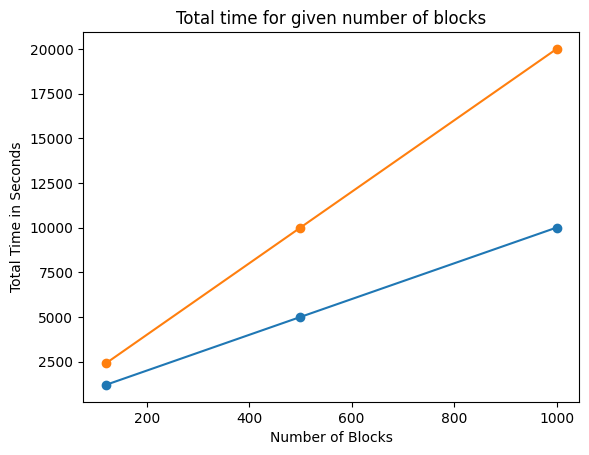

<Figure size 1000x500 with 0 Axes>

In [ ]:
#Line chart for plotting blocks creation time along with latencies #(@Haya)
import matplotlib.pyplot as plt
n_list = [120,500,1000]
average_latency_list = [10,20]
#Seperating blocks for 10 and 20 seconds latencies respectively
latency_10sec = [1201.0311,5004.421,10008.927]
blocks_10sec = [120,500,1000]
latency_20sec = [2402.097,10008.1635,20008.92]
blocks_20sec = [120,500,1000]
plt.plot(blocks_10sec,latency_10sec,marker = 'o', label= '10 secs average latency')
plt.plot(blocks_20sec,latency_20sec,marker = 'o',label= '20 secs average latency')
#Adding labels
plt.xlabel("Number of Blocks")
plt.ylabel("Total Time in Seconds")
plt.title("Total time for given number of blocks")
plt.figure(figsize=(10,5))
plt.show()


In [ ]:
import matplotlib.pyplot as plt #(@Tanmay)

# Proof of Work Distribution
proof_of_work_values = [block['proof_of_work'] for block in chain_of_blocks]

plt.hist(proof_of_work_values, bins=20, edgecolor='black')
plt.xlabel('Proof of Work Values')
plt.ylabel('Number of Blocks')
plt.title('Proof of Work Distribution')
plt.show()

In [ ]:
#Transaction Data Analysis(@Tanmay)
transaction_sizes = [len(block['transaction_data']) for block in chain_of_blocks]
block_indices = [block['block_index'] for block in chain_of_blocks]

plt.scatter(block_indices, transaction_sizes)
plt.xlabel('Block Index')
plt.ylabel('Transaction Size')
plt.title('Transaction Data Analysis')
plt.show()


In [ ]:
# Average Latency Over Time  #@Aviraaj
average_latencies = [random.uniform(5, 15) for _ in range(len(chain_of_blocks))]  # Replace with actual average latency values

plt.plot(block_indices, average_latencies)
plt.xlabel('Block Index')
plt.ylabel('Average Latency (s)')
plt.title('Average Latency Over Time')
plt.show()

NameError: ignored

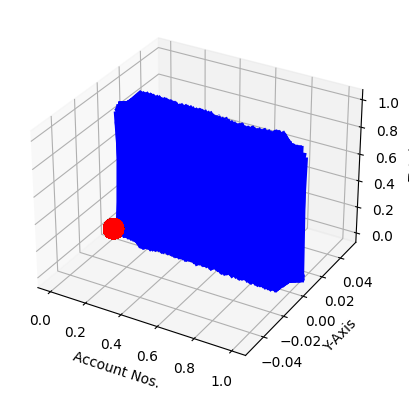

In [ ]:
#(@Haya) Visualizing our Loan Accounts Blockchain with 3-D layout
#Reference : Tutorialspoint.com.Python - Visualize graphs generated in NetworkX using Matplotlib. [online] Available at: https://www.tutorialspoint.com/python-visualize-graphs-generated-in-networkx-using-matplotlib [Accessed 2 Dec. 2023].
import networkx as nx

di = nx.DiGraph()
#Create nodes for each account based on account number
acc_number = [account['Loan Account Number'] for account in json_to_list]
positions_for_node = [i for i, acc_number in enumerate(json_to_list)]
fig = plt.figure()
subfig = fig.add_subplot(111,projection = '3d')

#Plotting nodes :
x = positions_for_node
y = [0]*len(x)
z = [0]* len(x)
subfig.scatter(x,y,z,c='red',marker='o',s=200,label= 'Nodes' )

#Creating an edge so that 2 consecutive blocks are connected to each other in a chain :
for i in range(len(json_to_list)-1):
  present_account_numb = json_to_list[i]['Loan Account Number']
  next_account_number = json_to_list[i+1]['Loan Account Number']
  #Alotting weights for edges based on Loan Amount to reduce large values :
  loan_amount = json_to_list[i]['Loan Amount']
  weight = loan_amount/1000
  linewidth = weight*0.5 #setting edge linewidth based on weight calculated
  subfig.plot([present_account_numb,next_account_number],[0,0],[0,1],c='blue',linestyle='dashed',linewidth=linewidth)
#Labels
subfig.set_xlabel('Account Nos.')
subfig.set_ylabel("Y-Axis")
subfig.set_zlabel("Z-Axis");



In [ ]:
#Creating a Density Plot for Monthly Payments : @Aviraaj
terms = [loan_term['Loan Term'] for loan_term in json_to_list]
MP = [MP['Monthly Payment'] for MP in json_to_list]
plt.figure(figsize=(12,6))
plt.hist(MP, bins = 10 , color = 'red' , edgecolor = 'purple',alpha=0.8)
plt.grid(axis='y')
plt.xlabel("Monthly Payment")
plt.ylabel("Density")
plt.title('Density Plot for Monthly Payments')
plt.tight_layout()
plt.show()

In [ ]:
#Histogram of loan amounts in the dataset #(@Daphne)
import matplotlib.pyplot as plt

# Extract the loan amounts
loan_amounts = []
for dictionary in json_to_list:
    if len(dictionary) >= 3:
        loan_amounts.append(list(dictionary.values())[2])

# Plotting the loan amounts
plt.hist(loan_amounts, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amounts')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Illustrate the loan amount proportions (@Daphne)
import matplotlib.pyplot as plt

# Define the loan amount categories
categories = ['0 - 10k', '20k - 30k', '30k - 40k', '40k - 50k']

# Extract the loan amounts
loan_amounts = []
for dictionary in json_to_list:
    if len(dictionary) >= 3:
        loan_amount = list(dictionary.values())[2]
        loan_amounts.append(loan_amount)

# Count the occurrences of loan amounts within each category
category_counts = [0, 0, 0, 0]
for loan_amount in loan_amounts:
    if loan_amount >= 0 and loan_amount <= 10000:
        category_counts[0] += 1
    elif loan_amount >= 20000 and loan_amount <= 30000:
        category_counts[1] += 1
    elif loan_amount >= 30000 and loan_amount <= 40000:
        category_counts[2] += 1
    elif loan_amount >= 40000 and loan_amount <= 50000:
        category_counts[3] += 1

# Calculate the percentages of loan amounts within each category
total_loans = len(loan_amounts)
category_percentages = [count / total_loans * 100 for count in category_counts]

#Define the colors for the pie chart
colors = ['aliceblue', 'lightskyblue', 'cornflowerblue', 'dodgerblue']

# Generate the pie chart
plt.pie(category_percentages, autopct='%1.1f%%',colors=colors)
plt.title('Loan Amount Categories')

# Add legend outside the pie chart using bbox_to_anchor
plt.legend(categories, title='Loan Amount', bbox_to_anchor=(1, 0.5), loc="center left")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Visualizing our Loan Accounts Blockchain with Spring Layout#(@Haya)
#Reference :Tutorialspoint.com. Python - Visualize graphs generated in NetworkX using Matplotlib. [online] Available at: https://www.tutorialspoint.com/python-visualize-graphs-generated-in-networkx-using-matplotlib [Accessed 2 Dec. 2023].
import networkx as nx
di = nx.DiGraph()
#Create nodes for each account based on account number
for account in json_to_list :
  acc_number = account['Loan Account Number']
  di.add_node(acc_number)

#Creating an edge so that 2 consecutive blocks are connected to each other in a chain :
for i in range(len(json_to_list)-1):
  present_account_numb = json_to_list[i]['Loan Account Number']
  next_account_number = json_to_list[i+1]['Loan Account Number']
  #Alotting weights for edges based on Loan Amount to reduce large values :
  loan_amount = json_to_list[i]['Loan Amount']
  weight = loan_amount/1000
  di.add_edge(present_account_numb,next_account_number)
  #Visualizing the blockchain with some layout edits :
pos = nx.spring_layout(di)
labels = nx.get_edge_attributes(di,'label') #lables for the blockchain
labels_for_node = nx.get_node_attributes(di,'label') #lables for the nodes

#Adding labels
#Edge labels
nx.draw(di, pos, node_color ="red", node_size = 10,alpha =0.8, font_size =7.5 )
#Adding a title and plotting the blockchain network
plt.title("Blockchain", fontsize = 20)
plt.show()